Plants Seedling Classification- Problem Statement<a href="#Plants-Seedling-Classification--Problem-Statement" class="anchor-link">¶</a>
---------------------------------------------------------------------------------------------------------------------------------------

**Description** **Background and Context**

In recent times, the field of agriculture has been in urgent need of
modernizing, since the amount of manual work people need to put in to
check if plants are growing correctly is still highly extensive. Despite
several advances in agricultural technology, people working in the
agricultural industry still need to have the ability to sort and
recognize different plants and weeds, which takes a lot of time and
effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly
impacted by technological innovations that cut down on the requirement
for manual labor, and this is where Artificial Intelligence can benefit
the workers in this field, as the time and energy required to identify
plant seedlings will be greatly shortened by the use of AI and Deep
Learning. The ability to do so far more efficiently and even more
effectively than experienced manual labor could lead to better crop
yields, the freeing up of human involvement for higher-order
agricultural decision making, and in the long term will result in more
sustainable environmental practices in agriculture as well.

**Objective**

The Aarhus University Signal Processing group, in collaboration with the
University of Southern Denmark, has provided the data containing images
of unique plants belonging to 12 different species. You being a data
scientist, need to build a Convolutional Neural Network model which
would classify the plant seedlings into their respective 12 categories.

**Data Description**

This dataset contains images of unique plants belonging to 12 different
species. The data file names are: images.npy Label.csv Due to the large
volume of data, the images were converted to numpy arrays and stored in
images.npy file and the corresponding labels are also put into
Labels.csv so that you can work on the data/project seamlessly without
having to worry about the high data volume. The goal of the project is
to create a classifier capable of determining a plant's species from an
image. List of Plant species

-   Black-grass
-   Charlock
-   Cleavers
-   Common Chickweed
-   Common Wheat
-   Fat Hen
-   Loose Silky-bent
-   Maize
-   Scentless Mayweed
-   Shepherds Purse
-   Small-flowered Cranesbill
-   Sugar beet
-   Guide to solve the project seamlessly

IMPORT LIBRARIES<a href="#IMPORT-LIBRARIES" class="anchor-link">¶</a>
=====================================================================

In \[130\]:

    import numpy as np # MATRIX OPERATIONS
    import pandas as pd # EFFICIENT DATA STRUCTURES
    import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
    import math # MATHEMATICAL OPERATIONS
    import cv2 # IMAGE PROCESSING - OPENCV
    from glob import glob # FILE OPERATIONS
    import itertools
    # KERAS AND SKLEARN MODULES
    from keras.utils import np_utils
    import tensorflow as tf
    from tensorflow.keras.optimizers import Adam,SGD   
    from keras.preprocessing.image import ImageDataGenerator
    from keras.models import Sequential,  load_model
    from keras.layers import Dense
    from keras import layers
    import seaborn as sns  
    from keras.layers import Dropout
    from keras.layers import Flatten
    from keras.layers.convolutional import Conv2D
    from keras.layers.convolutional import MaxPooling2D
    from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
    from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger
    from sklearn.model_selection import train_test_split
    from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
    from keras.optimizers import RMSprop
    from keras.optimizers import Adam

    # Set the CNN model 
    batch_size = None
    from sklearn import preprocessing
    from sklearn.metrics import confusion_matrix
    # GLOBAL VARIABLES
    ScaleTo = 70 
    seed = 7
    # Ignore warnings
    import warnings
    warnings.filterwarnings('ignore')

**Reading the dataset**<a href="#Reading-the-dataset" class="anchor-link">¶</a>
-------------------------------------------------------------------------------

In \[16\]:

    # Load the image file of the dataset
    images = np.load('images.npy')
    # Load the labels file of the dataset
    labels = pd.read_csv('Labels.csv') 

**Exploratory Data Analysis**<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>
-------------------------------------------------------------------------------------------

-   Now we will convert these BGR images to RGB images so we could
    interpret them easily.

In \[19\]:

    for i in range(len(images)):
      images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In \[20\]:

    # Show some example images
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])

<img src="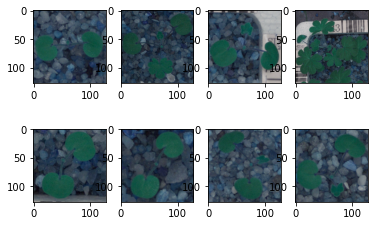%0A" class="jp-needs-light-background" />

In \[21\]:

    def plot_images(images,labels):
      num_classes=10                                                                  # Number of Classes
      categories=np.unique(labels)   
      keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
      rows = 3                                                                        # Defining number of rows=3
      cols = 4                                                                        # Defining number of columns=4
      fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
      for i in range(cols):
          for j in range(rows):
              random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
              ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
              ax.imshow(images[random_index, :])                                      # Plotting the image 
              ax.set_title(keys[random_index])
      plt.show()

In \[22\]:

    plot_images(images,labels)

<img src="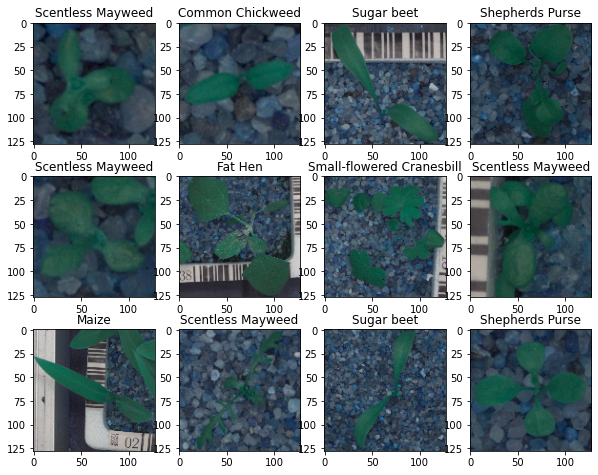%0A" class="jp-needs-light-background" />

As we can see, every photo of plant seedling has an background, so let's
try to remove it. It'll help us to goal better model accuracy

Data Cleaning<a href="#Data-Cleaning" class="anchor-link">¶</a>
---------------------------------------------------------------

For removing the background, we'll use the fact, that all plants on our
photos are green. We can create a mask, which will leave some range of
green color and remove other part of image

Masking green plant For creating mask, which will remove background, we
need to convert RGB image to HSV. HSV is alternative of the RGB color
model. In HSV, it is easier to represent a color range than in RGB color
space.

Besides of this, we'll blur image firstly for removing noise. After
creating HSV image, we'll create mask based on empirically selected
range of green color, convert it to boolean mask and apply it to the
origin image.

-   Use gaussian blur for remove noise
-   Convert color to HSV
-   Create mask
-   Create boolean mask
-   Apply boolean mask and getting image whithout background

In \[23\]:

    clearTrainImg = []
    examples = []; getEx = True
    for img in images:
        # Use gaussian blur
        blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
        
        # Convert to HSV image
        hsvImg = cv2.cvtColor(blurImg, cv2.COLOR_BGR2HSV)  
        
        # Create mask (parameters - green color range)
        lower_green = (25, 40, 50)
        upper_green = (75, 255, 255)
        mask = cv2.inRange(hsvImg, lower_green, upper_green)  
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        
        # Create bool mask
        bMask = mask > 0  
        
        # Apply the mask
        clear = np.zeros_like(img, np.uint8)  # Create empty image
        clear[bMask] = img[bMask]  # Apply boolean mask to the origin image
        
        clearTrainImg.append(clear)  # Append image without backgroung
        
        # Show examples
        if getEx:
            plt.subplot(2, 3, 1); plt.imshow(img)  # Show the original image
            plt.subplot(2, 3, 2); plt.imshow(blurImg)  # Blur image
            plt.subplot(2, 3, 3); plt.imshow(hsvImg)  # HSV image
            plt.subplot(2, 3, 4); plt.imshow(mask)  # Mask
            plt.subplot(2, 3, 5); plt.imshow(bMask)  # Boolean mask
            plt.subplot(2, 3, 6); plt.imshow(clear)  # Image without background
            getEx = False

    clearTrainImg = np.asarray(clearTrainImg)

<img src="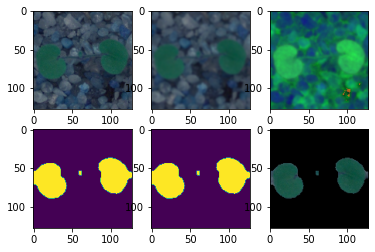%0A" class="jp-needs-light-background" />

In \[24\]:

    # Show some example images
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(clearTrainImg[i])

<img src="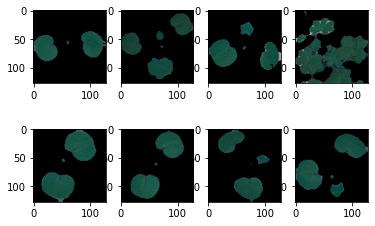%0A" class="jp-needs-light-background" />

Here we removed most of the background.

#### **Checking for data imbalance**<a href="#Checking-for-data-imbalance" class="anchor-link">¶</a>

Normalize input<a href="#Normalize-input" class="anchor-link">¶</a>
-------------------------------------------------------------------

In \[25\]:

    clearTrainImg = clearTrainImg / 255

Categories labels<a href="#Categories-labels" class="anchor-link">¶</a>
-----------------------------------------------------------------------

In \[26\]:

    from keras.utils import np_utils
    from sklearn import preprocessing
    import matplotlib.pyplot as plt

    # Encode labels and create classes
    le = preprocessing.LabelEncoder()
    le.fit(labels["Label"])
    print("Classes: " + str(le.classes_))
    encodeTrainLabels = le.transform(labels["Label"])

    # Make labels categorical
    clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
    num_clases = clearTrainLabel.shape[1]
    print("Number of classes: " + str(num_clases))

    # Plot of label types numbers
    labels["Label"].value_counts().plot(kind='bar')

    Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
     'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
     'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
    Number of classes: 12

Out\[26\]:

    <AxesSubplot:>

<img src="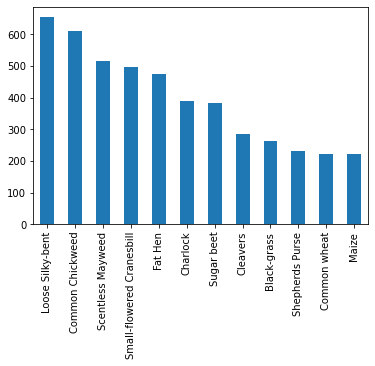%0A" class="jp-needs-light-background" />

-   From the above figure, we can see that, the dataset is unbalanced.
-   Few of them have more than 500 images and four of them have less
    than 300 images, and the rest have between 300- 500 images

Model<a href="#Model" class="anchor-link">¶</a>
-----------------------------------------------

### Defining Models and Spliting the Dataset<a href="#Defining-Models-and-Spliting-the-Dataset" class="anchor-link">¶</a>

In this step, we are going to split the training dataset for validation.
We are using the train\_test\_split() function from scikit-learn. Here
we are splitting the dataset keeping the test\_size=0.1. It means 10% of
total data is used as testing data and the other 90% as training data.
Check the below code for splitting the dataset.

In \[35\]:

    from sklearn.model_selection import train_test_split
    # I used a 90% - 10% test train split, stratified according to training labels.  The code is from NikKonst (2018)
    X_train, X_test, y_train, y_test = train_test_split(clearTrainImg, clearTrainLabel, test_size=0.1, random_state=seed)

In \[28\]:

    X_train.shape

Out\[28\]:

    (4275, 128, 128, 3)

### Model A<a href="#Model-A" class="anchor-link">¶</a>

-   This model has 4 conv layers, each followed by a maxpooling layer
    and 2 dense layers. There is no dropout or batch normalization.

In \[38\]:

    from keras.preprocessing.image import ImageDataGenerator

    datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

In \[39\]:

    # second model with 4 conv layers taken from Chollet, (2018), page 134.
    model = Sequential() 
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3))) 
    model.add(MaxPooling2D((2, 2))) # to downsample the feature maps
    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2))) 
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2))) 
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2))) 
    model.add(Flatten()) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_clases, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_A = model
    model_A.summary()

    Model: "sequential_3"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     conv2d_14 (Conv2D)          (None, 126, 126, 32)      896       
                                                                     
     max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
     g2D)                                                            
                                                                     
     conv2d_15 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                     
     max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
     g2D)                                                            
                                                                     
     conv2d_16 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                     
     max_pooling2d_13 (MaxPoolin  (None, 14, 14, 128)      0         
     g2D)                                                            
                                                                     
     conv2d_17 (Conv2D)          (None, 12, 12, 128)       147584    
                                                                     
     max_pooling2d_14 (MaxPoolin  (None, 6, 6, 128)        0         
     g2D)                                                            
                                                                     
     flatten_2 (Flatten)         (None, 4608)              0         
                                                                     
     dense_6 (Dense)             (None, 64)                294976    
                                                                     
     dense_7 (Dense)             (None, 12)                780       
                                                                     
    =================================================================
    Total params: 536,588
    Trainable params: 536,588
    Non-trainable params: 0
    _________________________________________________________________

In \[40\]:

    history_A = model_A.fit_generator(datagen.flow(X_train, y_train, batch_size=75), epochs=35, validation_data=(X_test, y_test), verbose=2)
    #t1=time.time()

    # Final evaluation of the model
    scores = model_A.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

    Epoch 1/35
    57/57 - 32s - loss: 2.0544 - accuracy: 0.2702 - val_loss: 1.8095 - val_accuracy: 0.3579 - 32s/epoch - 566ms/step
    Epoch 2/35
    57/57 - 35s - loss: 1.6802 - accuracy: 0.3991 - val_loss: 1.6504 - val_accuracy: 0.4232 - 35s/epoch - 616ms/step
    Epoch 3/35
    57/57 - 54s - loss: 1.4876 - accuracy: 0.4713 - val_loss: 1.2871 - val_accuracy: 0.5789 - 54s/epoch - 952ms/step
    Epoch 4/35
    57/57 - 50s - loss: 1.3263 - accuracy: 0.5387 - val_loss: 1.2180 - val_accuracy: 0.5789 - 50s/epoch - 873ms/step
    Epoch 5/35
    57/57 - 38s - loss: 1.2184 - accuracy: 0.5827 - val_loss: 1.0880 - val_accuracy: 0.6021 - 38s/epoch - 670ms/step
    Epoch 6/35
    57/57 - 35s - loss: 1.1491 - accuracy: 0.6154 - val_loss: 0.9180 - val_accuracy: 0.6695 - 35s/epoch - 610ms/step
    Epoch 7/35
    57/57 - 33s - loss: 1.0635 - accuracy: 0.6451 - val_loss: 0.8480 - val_accuracy: 0.7242 - 33s/epoch - 574ms/step
    Epoch 8/35
    57/57 - 32s - loss: 0.9958 - accuracy: 0.6599 - val_loss: 0.8823 - val_accuracy: 0.7032 - 32s/epoch - 564ms/step
    Epoch 9/35
    57/57 - 34s - loss: 0.8968 - accuracy: 0.7011 - val_loss: 0.6894 - val_accuracy: 0.7579 - 34s/epoch - 590ms/step
    Epoch 10/35
    57/57 - 35s - loss: 0.8610 - accuracy: 0.7071 - val_loss: 0.7756 - val_accuracy: 0.7453 - 35s/epoch - 610ms/step
    Epoch 11/35
    57/57 - 34s - loss: 0.7822 - accuracy: 0.7380 - val_loss: 0.7022 - val_accuracy: 0.7389 - 34s/epoch - 595ms/step
    Epoch 12/35
    57/57 - 33s - loss: 0.7850 - accuracy: 0.7345 - val_loss: 0.6256 - val_accuracy: 0.7979 - 33s/epoch - 578ms/step
    Epoch 13/35
    57/57 - 35s - loss: 0.7615 - accuracy: 0.7408 - val_loss: 0.6611 - val_accuracy: 0.7853 - 35s/epoch - 606ms/step
    Epoch 14/35
    57/57 - 35s - loss: 0.7307 - accuracy: 0.7462 - val_loss: 0.7592 - val_accuracy: 0.7347 - 35s/epoch - 615ms/step
    Epoch 15/35
    57/57 - 34s - loss: 0.6935 - accuracy: 0.7642 - val_loss: 0.6162 - val_accuracy: 0.7747 - 34s/epoch - 595ms/step
    Epoch 16/35
    57/57 - 33s - loss: 0.6397 - accuracy: 0.7804 - val_loss: 0.6379 - val_accuracy: 0.7832 - 33s/epoch - 583ms/step
    Epoch 17/35
    57/57 - 34s - loss: 0.5999 - accuracy: 0.7965 - val_loss: 0.5767 - val_accuracy: 0.8105 - 34s/epoch - 603ms/step
    Epoch 18/35
    57/57 - 35s - loss: 0.6337 - accuracy: 0.7876 - val_loss: 0.5774 - val_accuracy: 0.7958 - 35s/epoch - 614ms/step
    Epoch 19/35
    57/57 - 34s - loss: 0.5795 - accuracy: 0.8026 - val_loss: 0.4744 - val_accuracy: 0.8421 - 34s/epoch - 593ms/step
    Epoch 20/35
    57/57 - 33s - loss: 0.5449 - accuracy: 0.8119 - val_loss: 0.4796 - val_accuracy: 0.8379 - 33s/epoch - 581ms/step
    Epoch 21/35
    57/57 - 35s - loss: 0.5340 - accuracy: 0.8159 - val_loss: 0.4541 - val_accuracy: 0.8484 - 35s/epoch - 621ms/step
    Epoch 22/35
    57/57 - 34s - loss: 0.5104 - accuracy: 0.8147 - val_loss: 0.4623 - val_accuracy: 0.8379 - 34s/epoch - 605ms/step
    Epoch 23/35
    57/57 - 34s - loss: 0.4920 - accuracy: 0.8288 - val_loss: 0.5082 - val_accuracy: 0.8253 - 34s/epoch - 589ms/step
    Epoch 24/35
    57/57 - 33s - loss: 0.4577 - accuracy: 0.8370 - val_loss: 0.6009 - val_accuracy: 0.8084 - 33s/epoch - 583ms/step
    Epoch 25/35
    57/57 - 35s - loss: 0.4920 - accuracy: 0.8262 - val_loss: 0.4263 - val_accuracy: 0.8379 - 35s/epoch - 615ms/step
    Epoch 26/35
    57/57 - 34s - loss: 0.4791 - accuracy: 0.8313 - val_loss: 0.4864 - val_accuracy: 0.8295 - 34s/epoch - 603ms/step
    Epoch 27/35
    57/57 - 33s - loss: 0.4454 - accuracy: 0.8409 - val_loss: 0.3901 - val_accuracy: 0.8695 - 33s/epoch - 585ms/step
    Epoch 28/35
    57/57 - 34s - loss: 0.4395 - accuracy: 0.8388 - val_loss: 0.4276 - val_accuracy: 0.8421 - 34s/epoch - 593ms/step
    Epoch 29/35
    57/57 - 35s - loss: 0.4158 - accuracy: 0.8545 - val_loss: 0.3491 - val_accuracy: 0.8632 - 35s/epoch - 617ms/step
    Epoch 30/35
    57/57 - 34s - loss: 0.4079 - accuracy: 0.8571 - val_loss: 0.4217 - val_accuracy: 0.8337 - 34s/epoch - 598ms/step
    Epoch 31/35
    57/57 - 33s - loss: 0.3969 - accuracy: 0.8604 - val_loss: 0.3286 - val_accuracy: 0.8821 - 33s/epoch - 579ms/step
    Epoch 32/35
    57/57 - 34s - loss: 0.3711 - accuracy: 0.8639 - val_loss: 0.4395 - val_accuracy: 0.8589 - 34s/epoch - 595ms/step
    Epoch 33/35
    57/57 - 35s - loss: 0.3773 - accuracy: 0.8646 - val_loss: 0.3826 - val_accuracy: 0.8632 - 35s/epoch - 610ms/step
    Epoch 34/35
    57/57 - 34s - loss: 0.3575 - accuracy: 0.8667 - val_loss: 0.4013 - val_accuracy: 0.8358 - 34s/epoch - 593ms/step
    Epoch 35/35
    57/57 - 34s - loss: 0.3733 - accuracy: 0.8653 - val_loss: 0.3285 - val_accuracy: 0.8905 - 34s/epoch - 589ms/step

    ---------------------------------------------------------------------------
    NameError                                 Traceback (most recent call last)
    Input In [40], in <cell line: 3>()
          1 history_A = model_A.fit_generator(datagen.flow(X_train, y_train, batch_size=75), epochs=35, validation_data=(X_test, y_test), verbose=2)
          2 #t1=time.time()
    ----> 3 print(t1-t0," seconds")
          5 # Final evaluation of the model
          6 scores = model_A.evaluate(X_test, y_test, verbose=0)

    NameError: name 't1' is not defined

In \[41\]:

    print(model_A.evaluate(X_train, y_train))  # Evaluate on train set
    print(model_A.evaluate(X_test, y_test))  # Evaluate on test set

    134/134 [==============================] - 7s 52ms/step - loss: 0.2421 - accuracy: 0.9137
    [0.24213436245918274, 0.9136841893196106]
    15/15 [==============================] - 1s 52ms/step - loss: 0.3285 - accuracy: 0.8905
    [0.3285052180290222, 0.890526294708252]

In \[42\]:

    # plot training accuracies
    plt.plot(history_A.history['accuracy'],'b') #train acc
    plt.plot(history_A.history['val_accuracy'],'g') #val acc
    plt.title('Training and Validation Accuracy') 
    plt.show()

<img src="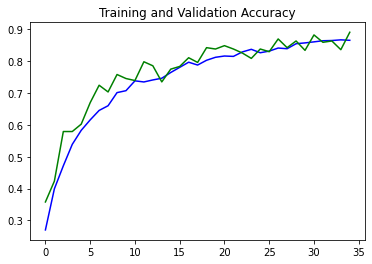%0A" class="jp-needs-light-background" />

In \[43\]:

    plt.plot(history_A.history['loss'],'b') #train loss
    plt.plot(history_A.history['val_loss'],'g') #val loss
    plt.title('Training and Validation loss') 
    plt.show()

<img src="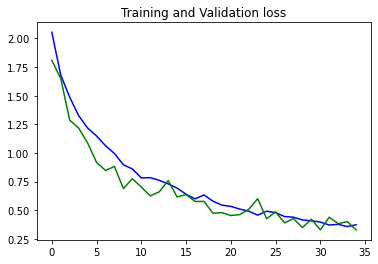%0A" class="jp-needs-light-background" />

In \[47\]:

    # Obtaining the categorical values from y_test_encoded and y_pred
    y_pred = model_A.predict(X_test)
    y_pred_arg=np.argmax(y_pred,axis=1)
    y_test_arg=np.argmax(y_test, axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

    15/15 [==============================] - 1s 48ms/step

<img src="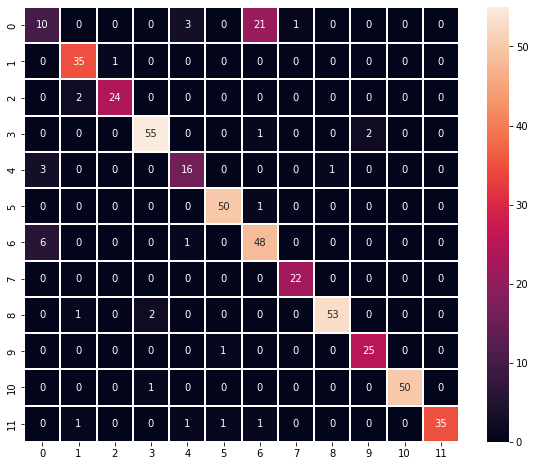%0A" class="jp-needs-light-background" />

The results of model\_A are a validation accuracy of 89% and an error
rate of 11%.The training and validation accuracies and losses converge
nicely and there seems to be no overfitting.

### Model B<a href="#Model-B" class="anchor-link">¶</a>

This model consists of 5 conv layers followed by max pooling layers, and
2 dense layers. I tried adding batch normalization and dropout layers,
but this did not improve performance.

In \[44\]:

    model = Sequential() 
    model.add(layers.Conv2D(80, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same')) 
    model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps

    model.add(layers.Conv2D(80, (3, 3), activation='relu'))
    # model.add(BatchNormalization()) # normalize inputs, training converges faster, no help in this model
    model.add(layers.MaxPooling2D((2, 2))) 
    # model.add(Dropout(0.2)) # makes model smaller, reduces overfitting. No improvement seen with this.

    model.add(layers.Conv2D(160, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(160, (3, 3), activation='relu'))
    # model.add(BatchNormalization())

    model.add(layers.Conv2D(240, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2))) 
    # model.add(Dropout(0.5))

    model.add(layers.Flatten()) 
    model.add(layers.Dense(128, activation='relu'))
    # model.add(layers.Dense(75, activation='relu'))
    model.add(layers.Dense(num_clases, activation='softmax'))

    # adam = optimizers.Adam(lr=0.0001) I tried this learning rate but it did not improve performance
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model_B = model
    model_B.summary()

    Model: "sequential_4"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     conv2d_18 (Conv2D)          (None, 128, 128, 80)      2240      
                                                                     
     max_pooling2d_15 (MaxPoolin  (None, 64, 64, 80)       0         
     g2D)                                                            
                                                                     
     conv2d_19 (Conv2D)          (None, 62, 62, 80)        57680     
                                                                     
     max_pooling2d_16 (MaxPoolin  (None, 31, 31, 80)       0         
     g2D)                                                            
                                                                     
     conv2d_20 (Conv2D)          (None, 29, 29, 160)       115360    
                                                                     
     max_pooling2d_17 (MaxPoolin  (None, 14, 14, 160)      0         
     g2D)                                                            
                                                                     
     conv2d_21 (Conv2D)          (None, 12, 12, 160)       230560    
                                                                     
     conv2d_22 (Conv2D)          (None, 10, 10, 240)       345840    
                                                                     
     max_pooling2d_18 (MaxPoolin  (None, 5, 5, 240)        0         
     g2D)                                                            
                                                                     
     flatten_3 (Flatten)         (None, 6000)              0         
                                                                     
     dense_8 (Dense)             (None, 128)               768128    
                                                                     
     dense_9 (Dense)             (None, 12)                1548      
                                                                     
    =================================================================
    Total params: 1,521,356
    Trainable params: 1,521,356
    Non-trainable params: 0
    _________________________________________________________________

In \[45\]:

    history_B = model_B.fit_generator(datagen.flow(X_train, y_train, batch_size=75), epochs=35, validation_data=(X_test, y_test), verbose=2)
    #t1=time.time()

    Epoch 1/35
    57/57 - 69s - loss: 2.1915 - accuracy: 0.2386 - val_loss: 1.8552 - val_accuracy: 0.3684 - 69s/epoch - 1s/step
    Epoch 2/35
    57/57 - 77s - loss: 1.8499 - accuracy: 0.3284 - val_loss: 1.7094 - val_accuracy: 0.3684 - 77s/epoch - 1s/step
    Epoch 3/35
    57/57 - 77s - loss: 1.6668 - accuracy: 0.3946 - val_loss: 1.4086 - val_accuracy: 0.5116 - 77s/epoch - 1s/step
    Epoch 4/35
    57/57 - 67s - loss: 1.5036 - accuracy: 0.4735 - val_loss: 1.2820 - val_accuracy: 0.5663 - 67s/epoch - 1s/step
    Epoch 5/35
    57/57 - 72s - loss: 1.3148 - accuracy: 0.5345 - val_loss: 1.1653 - val_accuracy: 0.5874 - 72s/epoch - 1s/step
    Epoch 6/35
    57/57 - 72s - loss: 1.1813 - accuracy: 0.5876 - val_loss: 1.0015 - val_accuracy: 0.6442 - 72s/epoch - 1s/step
    Epoch 7/35
    57/57 - 70s - loss: 1.0873 - accuracy: 0.6248 - val_loss: 1.0150 - val_accuracy: 0.6484 - 70s/epoch - 1s/step
    Epoch 8/35
    57/57 - 75s - loss: 0.9813 - accuracy: 0.6657 - val_loss: 0.8670 - val_accuracy: 0.7095 - 75s/epoch - 1s/step
    Epoch 9/35
    57/57 - 69s - loss: 0.9047 - accuracy: 0.6880 - val_loss: 0.8147 - val_accuracy: 0.7221 - 69s/epoch - 1s/step
    Epoch 10/35
    57/57 - 71s - loss: 0.8198 - accuracy: 0.7167 - val_loss: 0.6287 - val_accuracy: 0.7811 - 71s/epoch - 1s/step
    Epoch 11/35
    57/57 - 68s - loss: 0.7642 - accuracy: 0.7357 - val_loss: 0.5703 - val_accuracy: 0.7916 - 68s/epoch - 1s/step
    Epoch 12/35
    57/57 - 68s - loss: 0.6627 - accuracy: 0.7719 - val_loss: 0.5182 - val_accuracy: 0.8126 - 68s/epoch - 1s/step
    Epoch 13/35
    57/57 - 68s - loss: 0.6141 - accuracy: 0.7827 - val_loss: 0.6536 - val_accuracy: 0.7747 - 68s/epoch - 1s/step
    Epoch 14/35
    57/57 - 67s - loss: 0.6219 - accuracy: 0.7820 - val_loss: 0.4400 - val_accuracy: 0.8379 - 67s/epoch - 1s/step
    Epoch 15/35
    57/57 - 68s - loss: 0.5095 - accuracy: 0.8215 - val_loss: 0.4412 - val_accuracy: 0.8442 - 68s/epoch - 1s/step
    Epoch 16/35
    57/57 - 68s - loss: 0.5018 - accuracy: 0.8215 - val_loss: 0.3582 - val_accuracy: 0.8653 - 68s/epoch - 1s/step
    Epoch 17/35
    57/57 - 68s - loss: 0.4886 - accuracy: 0.8288 - val_loss: 0.4226 - val_accuracy: 0.8526 - 68s/epoch - 1s/step
    Epoch 18/35
    57/57 - 68s - loss: 0.4722 - accuracy: 0.8363 - val_loss: 0.3703 - val_accuracy: 0.8674 - 68s/epoch - 1s/step
    Epoch 19/35
    57/57 - 68s - loss: 0.4254 - accuracy: 0.8489 - val_loss: 0.3321 - val_accuracy: 0.8863 - 68s/epoch - 1s/step
    Epoch 20/35
    57/57 - 67s - loss: 0.4074 - accuracy: 0.8585 - val_loss: 0.3201 - val_accuracy: 0.8779 - 67s/epoch - 1s/step
    Epoch 21/35
    57/57 - 69s - loss: 0.3691 - accuracy: 0.8678 - val_loss: 0.3410 - val_accuracy: 0.8800 - 69s/epoch - 1s/step
    Epoch 22/35
    57/57 - 67s - loss: 0.3835 - accuracy: 0.8669 - val_loss: 0.3566 - val_accuracy: 0.8821 - 67s/epoch - 1s/step
    Epoch 23/35
    57/57 - 68s - loss: 0.3657 - accuracy: 0.8699 - val_loss: 0.3205 - val_accuracy: 0.8947 - 68s/epoch - 1s/step
    Epoch 24/35
    57/57 - 67s - loss: 0.3420 - accuracy: 0.8758 - val_loss: 0.3364 - val_accuracy: 0.8695 - 67s/epoch - 1s/step
    Epoch 25/35
    57/57 - 68s - loss: 0.3180 - accuracy: 0.8880 - val_loss: 0.2866 - val_accuracy: 0.9032 - 68s/epoch - 1s/step
    Epoch 26/35
    57/57 - 67s - loss: 0.2796 - accuracy: 0.8982 - val_loss: 0.2742 - val_accuracy: 0.9011 - 67s/epoch - 1s/step
    Epoch 27/35
    57/57 - 68s - loss: 0.3163 - accuracy: 0.8835 - val_loss: 0.3753 - val_accuracy: 0.8568 - 68s/epoch - 1s/step
    Epoch 28/35
    57/57 - 67s - loss: 0.2889 - accuracy: 0.8971 - val_loss: 0.2653 - val_accuracy: 0.9032 - 67s/epoch - 1s/step
    Epoch 29/35
    57/57 - 68s - loss: 0.2744 - accuracy: 0.8987 - val_loss: 0.3262 - val_accuracy: 0.8968 - 68s/epoch - 1s/step
    Epoch 30/35
    57/57 - 67s - loss: 0.3130 - accuracy: 0.8833 - val_loss: 0.3791 - val_accuracy: 0.8653 - 67s/epoch - 1s/step
    Epoch 31/35
    57/57 - 69s - loss: 0.2842 - accuracy: 0.8992 - val_loss: 0.2803 - val_accuracy: 0.9053 - 69s/epoch - 1s/step
    Epoch 32/35
    57/57 - 67s - loss: 0.2823 - accuracy: 0.8994 - val_loss: 0.4388 - val_accuracy: 0.8611 - 67s/epoch - 1s/step
    Epoch 33/35
    57/57 - 68s - loss: 0.2525 - accuracy: 0.9071 - val_loss: 0.2599 - val_accuracy: 0.9179 - 68s/epoch - 1s/step
    Epoch 34/35
    57/57 - 67s - loss: 0.2512 - accuracy: 0.9020 - val_loss: 0.3395 - val_accuracy: 0.8905 - 67s/epoch - 1s/step
    Epoch 35/35
    57/57 - 68s - loss: 0.2424 - accuracy: 0.9125 - val_loss: 0.3708 - val_accuracy: 0.8611 - 68s/epoch - 1s/step

In \[46\]:

    print(model_B.evaluate(X_train, y_train))  # Evaluate on train set
    print(model_B.evaluate(X_test, y_test))  # Evaluate on test set

    134/134 [==============================] - 15s 111ms/step - loss: 0.3155 - accuracy: 0.8606
    [0.31549426913261414, 0.8605847954750061]
    15/15 [==============================] - 2s 106ms/step - loss: 0.3708 - accuracy: 0.8611
    [0.3708333969116211, 0.8610526323318481]

The results of model\_B are a validation accuracy of 86% and an error
rate of 16%. The training and validation accuracies and losses converge
nicely and there seems to be no overfitting. But, lower accuracy than
the previous model.

In \[48\]:

    # plot training accuracies
    plt.plot(history_B.history['accuracy'],'b') #train acc
    plt.plot(history_B.history['val_accuracy'],'g') #val acc
    plt.title('Training and Validation Accuracy') 
    plt.show()

<img src="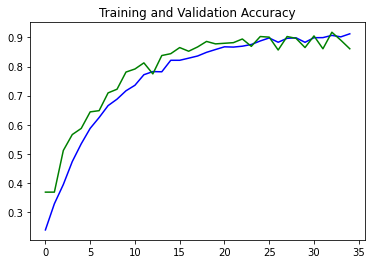%0A" class="jp-needs-light-background" />

In \[49\]:

    # plot training and validation loss
    plt.plot(history_B.history['loss'],'b') #train loss
    plt.plot(history_B.history['val_loss'],'g') #val loss
    plt.title('Training and Validation loss') 
    plt.show()

<img src="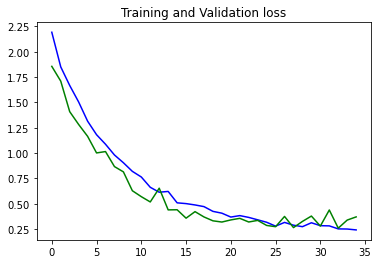%0A" class="jp-needs-light-background" />

In \[50\]:

    # Obtaining the categorical values from y_test_encoded and y_pred
    y_pred = model_B.predict(X_test)
    y_pred_arg=np.argmax(y_pred,axis=1)
    y_test_arg=np.argmax(y_test, axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

    15/15 [==============================] - 2s 107ms/step

<img src="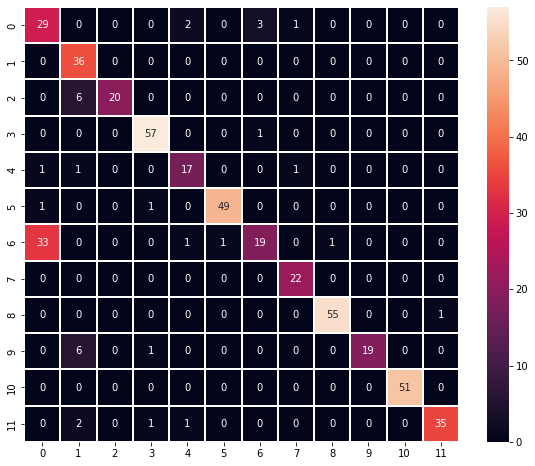%0A" class="jp-needs-light-background" />

The results of my model include a baseline error rate of 89% , a
validation accuracy of 12% with high underfittin and overfitting. The
performance of my model was worse with batch normalization and dropout
layers, resulting in an error rate of 89% and a validation accuracy of
82%. These layers also increased overfitting in the plots. The batch
normalization and dropout layers were commented out in the final
version.

### CNN Model with Data Augmentation<a href="#CNN-Model-with-Data-Augmentation" class="anchor-link">¶</a>

In \[51\]:

    from keras.callbacks import ReduceLROnPlateau

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                                patience=3, 
                                                verbose=1, 
                                                factor=0.5, 
                                                min_lr=0.00001)
    epochs = 30
    batch_size = 38

In \[52\]:

    datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image 
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images


    datagen.fit(X_train)

In \[53\]:

    X_train, X_test, y_train, y_test
    history_c = model_A.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                                  epochs = epochs, validation_data = (X_train,y_train),
                                  verbose = 2, steps_per_epoch=X_train.shape[0]//batch_size
                                  , callbacks=[learning_rate_reduction])

    Epoch 1/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 35s - loss: 0.3232 - accuracy: 0.8839 - val_loss: 0.3161 - val_accuracy: 0.8840 - lr: 0.0010 - 35s/epoch - 315ms/step
    Epoch 2/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 36s - loss: 0.3312 - accuracy: 0.8787 - val_loss: 0.2226 - val_accuracy: 0.9242 - lr: 0.0010 - 36s/epoch - 326ms/step
    Epoch 3/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.2417 - accuracy: 0.9143 - val_loss: 0.2394 - val_accuracy: 0.9060 - lr: 0.0010 - 40s/epoch - 361ms/step
    Epoch 4/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 52s - loss: 0.2621 - accuracy: 0.9044 - val_loss: 0.1632 - val_accuracy: 0.9404 - lr: 0.0010 - 52s/epoch - 465ms/step
    Epoch 5/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 43s - loss: 0.2461 - accuracy: 0.9063 - val_loss: 0.1720 - val_accuracy: 0.9357 - lr: 0.0010 - 43s/epoch - 384ms/step
    Epoch 6/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 38s - loss: 0.1938 - accuracy: 0.9285 - val_loss: 0.1493 - val_accuracy: 0.9394 - lr: 0.0010 - 38s/epoch - 342ms/step
    Epoch 7/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 38s - loss: 0.1854 - accuracy: 0.9261 - val_loss: 0.2070 - val_accuracy: 0.9226 - lr: 0.0010 - 38s/epoch - 341ms/step
    Epoch 8/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.1921 - accuracy: 0.9278 - val_loss: 0.1268 - val_accuracy: 0.9513 - lr: 0.0010 - 39s/epoch - 350ms/step
    Epoch 9/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.1957 - accuracy: 0.9294 - val_loss: 0.3137 - val_accuracy: 0.8573 - lr: 0.0010 - 39s/epoch - 350ms/step
    Epoch 10/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.1708 - accuracy: 0.9353 - val_loss: 0.1712 - val_accuracy: 0.9375 - lr: 0.0010 - 39s/epoch - 351ms/step
    Epoch 11/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1622 - accuracy: 0.9412 - val_loss: 0.0934 - val_accuracy: 0.9665 - lr: 0.0010 - 40s/epoch - 353ms/step
    Epoch 12/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1732 - accuracy: 0.9358 - val_loss: 0.1527 - val_accuracy: 0.9415 - lr: 0.0010 - 40s/epoch - 354ms/step
    Epoch 13/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1419 - accuracy: 0.9445 - val_loss: 0.1095 - val_accuracy: 0.9588 - lr: 0.0010 - 40s/epoch - 354ms/step
    Epoch 14/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1356 - accuracy: 0.9450 - val_loss: 0.1513 - val_accuracy: 0.9439 - lr: 0.0010 - 40s/epoch - 357ms/step
    Epoch 15/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.1912 - accuracy: 0.9313 - val_loss: 0.1645 - val_accuracy: 0.9352 - lr: 0.0010 - 39s/epoch - 350ms/step
    Epoch 16/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1516 - accuracy: 0.9426 - val_loss: 0.0874 - val_accuracy: 0.9703 - lr: 0.0010 - 40s/epoch - 356ms/step
    Epoch 17/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.1196 - accuracy: 0.9556 - val_loss: 0.0948 - val_accuracy: 0.9663 - lr: 0.0010 - 39s/epoch - 351ms/step
    Epoch 18/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1466 - accuracy: 0.9445 - val_loss: 0.1039 - val_accuracy: 0.9591 - lr: 0.0010 - 40s/epoch - 354ms/step
    Epoch 19/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1156 - accuracy: 0.9578 - val_loss: 0.0672 - val_accuracy: 0.9785 - lr: 0.0010 - 40s/epoch - 355ms/step
    Epoch 20/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1305 - accuracy: 0.9502 - val_loss: 0.0793 - val_accuracy: 0.9673 - lr: 0.0010 - 40s/epoch - 357ms/step
    Epoch 21/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.0930 - accuracy: 0.9679 - val_loss: 0.0864 - val_accuracy: 0.9682 - lr: 0.0010 - 39s/epoch - 351ms/step
    Epoch 22/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.0956 - accuracy: 0.9655 - val_loss: 0.0481 - val_accuracy: 0.9836 - lr: 0.0010 - 40s/epoch - 357ms/step
    Epoch 23/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.1373 - accuracy: 0.9507 - val_loss: 0.1113 - val_accuracy: 0.9563 - lr: 0.0010 - 39s/epoch - 352ms/step
    Epoch 24/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 41s - loss: 0.1029 - accuracy: 0.9665 - val_loss: 0.0604 - val_accuracy: 0.9804 - lr: 0.0010 - 41s/epoch - 363ms/step
    Epoch 25/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.1299 - accuracy: 0.9519 - val_loss: 0.0835 - val_accuracy: 0.9715 - lr: 0.0010 - 40s/epoch - 357ms/step
    Epoch 26/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.1037 - accuracy: 0.9592 - val_loss: 0.0647 - val_accuracy: 0.9799 - lr: 0.0010 - 39s/epoch - 351ms/step
    Epoch 27/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.0811 - accuracy: 0.9698 - val_loss: 0.0495 - val_accuracy: 0.9832 - lr: 0.0010 - 39s/epoch - 352ms/step
    Epoch 28/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 42s - loss: 0.0776 - accuracy: 0.9691 - val_loss: 0.0601 - val_accuracy: 0.9789 - lr: 0.0010 - 42s/epoch - 374ms/step
    Epoch 29/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 40s - loss: 0.0945 - accuracy: 0.9662 - val_loss: 0.0772 - val_accuracy: 0.9708 - lr: 0.0010 - 40s/epoch - 361ms/step
    Epoch 30/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 39s - loss: 0.0697 - accuracy: 0.9752 - val_loss: 0.0859 - val_accuracy: 0.9687 - lr: 0.0010 - 39s/epoch - 352ms/step

In \[54\]:

    print(model_A.evaluate(X_train, y_train))  # Evaluate on train set
    print(model_A.evaluate(X_test, y_test))  # Evaluate on test set

    134/134 [==============================] - 7s 49ms/step - loss: 0.0859 - accuracy: 0.9687
    [0.0859135314822197, 0.968654990196228]
    15/15 [==============================] - 1s 48ms/step - loss: 0.4548 - accuracy: 0.8863
    [0.4548243284225464, 0.8863157629966736]

The baseline loss for Augimented Model 12% and has the validation
accuracy is 88%. There is also more overfitting. This model did not
perform as well as the first two models.

In \[58\]:

    # plot training accuracies
    plt.plot(history_c.history['accuracy'],'b') #train acc
    plt.plot(history_c.history['val_accuracy'],'g') #val acc
    plt.title('Training and Validation Accuracy') 
    plt.show()

<img src="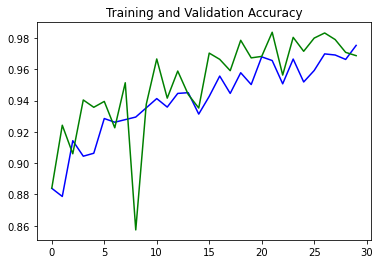%0A" class="jp-needs-light-background" />

In \[60\]:

    # plot training and validation loss
    plt.plot(history_c.history['loss'],'b') #train loss
    plt.plot(history_c.history['val_loss'],'g') #val loss
    plt.title('Training and Validation loss') 
    plt.show()

<img src="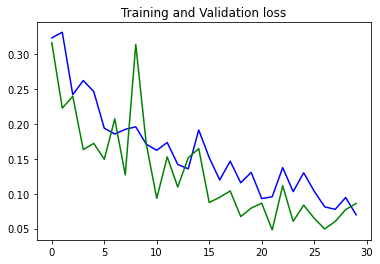%0A" class="jp-needs-light-background" />

In \[62\]:

    # Obtaining the categorical values from y_test_encoded and y_pred
    y_pred = model_A.predict(X_test)
    y_pred_arg=np.argmax(y_pred,axis=1)
    y_test_arg=np.argmax(y_test, axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

    15/15 [==============================] - 1s 44ms/step

<img src="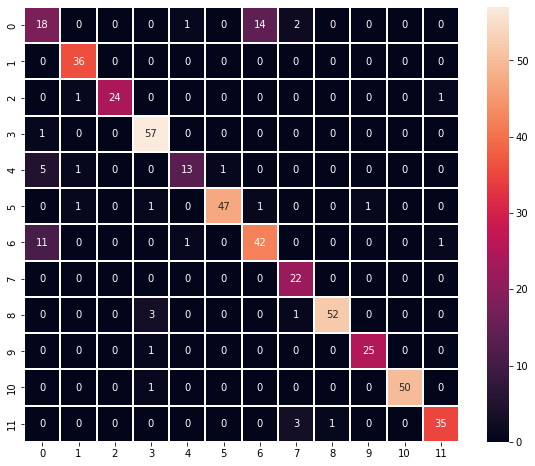%0A" class="jp-needs-light-background" />

### Transfer Learning Model- VGG16<a href="#Transfer-Learning-Model--VGG16" class="anchor-link">¶</a>

The last model tested is the VGG16 model from keras. This model includes
pretrained weights from Imagenet. The code for this process was taken
from Chollet (2018), Chapter 5 section 3 on using Pretrained Models.

In \[63\]:

    # code taken from Chollet, (2018)
    from keras.applications import VGG16 
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3) )
    conv_base.summary()

    Model: "vgg16"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                     
     block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                     
     block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                     
     block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                     
     block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                     
     block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                     
     block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                     
     block3_conv1 (Conv2D)       (None, 32, 32, 256)       295168    
                                                                     
     block3_conv2 (Conv2D)       (None, 32, 32, 256)       590080    
                                                                     
     block3_conv3 (Conv2D)       (None, 32, 32, 256)       590080    
                                                                     
     block3_pool (MaxPooling2D)  (None, 16, 16, 256)       0         
                                                                     
     block4_conv1 (Conv2D)       (None, 16, 16, 512)       1180160   
                                                                     
     block4_conv2 (Conv2D)       (None, 16, 16, 512)       2359808   
                                                                     
     block4_conv3 (Conv2D)       (None, 16, 16, 512)       2359808   
                                                                     
     block4_pool (MaxPooling2D)  (None, 8, 8, 512)         0         
                                                                     
     block5_conv1 (Conv2D)       (None, 8, 8, 512)         2359808   
                                                                     
     block5_conv2 (Conv2D)       (None, 8, 8, 512)         2359808   
                                                                     
     block5_conv3 (Conv2D)       (None, 8, 8, 512)         2359808   
                                                                     
     block5_pool (MaxPooling2D)  (None, 4, 4, 512)         0         
                                                                     
    =================================================================
    Total params: 14,714,688
    Trainable params: 14,714,688
    Non-trainable params: 0
    _________________________________________________________________

In \[86\]:

    # code from Chollet, (2018)
    from keras import models 
    from keras import layers
    model = models.Sequential() 
    model.add(conv_base) 
    model.add(layers.Flatten()) 
    model.add(layers.Dense(256, activation='relu')) 
    model.add(layers.Dense(12, activation='softmax'))

    model_VGG = model
    model_VGG.summary()

    Model: "sequential_9"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                     
     flatten_8 (Flatten)         (None, 8192)              0         
                                                                     
     dense_18 (Dense)            (None, 256)               2097408   
                                                                     
     dense_19 (Dense)            (None, 12)                3084      
                                                                     
    =================================================================
    Total params: 16,815,180
    Trainable params: 2,100,492
    Non-trainable params: 14,714,688
    _________________________________________________________________

In \[87\]:

    print('This is the number of trainable weights ' 'before freezing the conv base:', len(model_VGG.trainable_weights)) 
    conv_base.trainable = False
    print('This is the number of trainable weights ' 'after freezing the conv base:', len(model_VGG.trainable_weights)) 

    This is the number of trainable weights before freezing the conv base: 4
    This is the number of trainable weights after freezing the conv base: 4

In \[89\]:

    model_VGG.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In \[90\]:

    X_train, X_test, y_train, y_test
    history_c = model_VGG.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                                  epochs = epochs, validation_data = (X_train,y_train),
                                  verbose = 2, steps_per_epoch=X_train.shape[0]//batch_size
                                  , callbacks=[learning_rate_reduction])

    Epoch 1/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 235s - loss: 1.1654 - accuracy: 0.6165 - val_loss: 0.6126 - val_accuracy: 0.7916 - lr: 0.0010 - 235s/epoch - 2s/step
    Epoch 2/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 238s - loss: 0.5936 - accuracy: 0.7911 - val_loss: 0.3750 - val_accuracy: 0.8744 - lr: 0.0010 - 238s/epoch - 2s/step
    Epoch 3/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 232s - loss: 0.4853 - accuracy: 0.8277 - val_loss: 0.3559 - val_accuracy: 0.8678 - lr: 0.0010 - 232s/epoch - 2s/step
    Epoch 4/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 235s - loss: 0.3972 - accuracy: 0.8631 - val_loss: 0.2977 - val_accuracy: 0.9022 - lr: 0.0010 - 235s/epoch - 2s/step
    Epoch 5/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 235s - loss: 0.3656 - accuracy: 0.8692 - val_loss: 0.2653 - val_accuracy: 0.9069 - lr: 0.0010 - 235s/epoch - 2s/step
    Epoch 6/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 238s - loss: 0.3257 - accuracy: 0.8881 - val_loss: 0.3149 - val_accuracy: 0.8966 - lr: 0.0010 - 238s/epoch - 2s/step
    Epoch 7/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 242s - loss: 0.3028 - accuracy: 0.8933 - val_loss: 0.1668 - val_accuracy: 0.9478 - lr: 0.0010 - 242s/epoch - 2s/step
    Epoch 8/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 238s - loss: 0.2617 - accuracy: 0.9046 - val_loss: 0.2010 - val_accuracy: 0.9233 - lr: 0.0010 - 238s/epoch - 2s/step
    Epoch 9/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 240s - loss: 0.2756 - accuracy: 0.8990 - val_loss: 0.1839 - val_accuracy: 0.9277 - lr: 0.0010 - 240s/epoch - 2s/step
    Epoch 10/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 235s - loss: 0.2356 - accuracy: 0.9143 - val_loss: 0.1185 - val_accuracy: 0.9682 - lr: 0.0010 - 235s/epoch - 2s/step
    Epoch 11/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 244s - loss: 0.2175 - accuracy: 0.9233 - val_loss: 0.1740 - val_accuracy: 0.9404 - lr: 0.0010 - 244s/epoch - 2s/step
    Epoch 12/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 242s - loss: 0.2115 - accuracy: 0.9254 - val_loss: 0.1239 - val_accuracy: 0.9614 - lr: 0.0010 - 242s/epoch - 2s/step
    Epoch 13/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 236s - loss: 0.2113 - accuracy: 0.9207 - val_loss: 0.1048 - val_accuracy: 0.9694 - lr: 0.0010 - 236s/epoch - 2s/step
    Epoch 14/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 246s - loss: 0.1805 - accuracy: 0.9403 - val_loss: 0.0955 - val_accuracy: 0.9710 - lr: 0.0010 - 246s/epoch - 2s/step
    Epoch 15/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 231s - loss: 0.1618 - accuracy: 0.9455 - val_loss: 0.0763 - val_accuracy: 0.9789 - lr: 0.0010 - 231s/epoch - 2s/step
    Epoch 16/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 230s - loss: 0.1529 - accuracy: 0.9443 - val_loss: 0.1229 - val_accuracy: 0.9544 - lr: 0.0010 - 230s/epoch - 2s/step
    Epoch 17/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 228s - loss: 0.1715 - accuracy: 0.9377 - val_loss: 0.0893 - val_accuracy: 0.9663 - lr: 0.0010 - 228s/epoch - 2s/step
    Epoch 18/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 228s - loss: 0.1556 - accuracy: 0.9408 - val_loss: 0.0983 - val_accuracy: 0.9670 - lr: 0.0010 - 228s/epoch - 2s/step
    Epoch 19/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 229s - loss: 0.1776 - accuracy: 0.9337 - val_loss: 0.0926 - val_accuracy: 0.9689 - lr: 0.0010 - 229s/epoch - 2s/step
    Epoch 20/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 232s - loss: 0.1576 - accuracy: 0.9452 - val_loss: 0.0679 - val_accuracy: 0.9799 - lr: 0.0010 - 232s/epoch - 2s/step
    Epoch 21/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 229s - loss: 0.1364 - accuracy: 0.9519 - val_loss: 0.0644 - val_accuracy: 0.9841 - lr: 0.0010 - 229s/epoch - 2s/step
    Epoch 22/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 228s - loss: 0.1421 - accuracy: 0.9436 - val_loss: 0.0724 - val_accuracy: 0.9745 - lr: 0.0010 - 228s/epoch - 2s/step
    Epoch 23/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 228s - loss: 0.1452 - accuracy: 0.9467 - val_loss: 0.1279 - val_accuracy: 0.9520 - lr: 0.0010 - 228s/epoch - 2s/step
    Epoch 24/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 229s - loss: 0.1406 - accuracy: 0.9445 - val_loss: 0.0956 - val_accuracy: 0.9661 - lr: 0.0010 - 229s/epoch - 2s/step
    Epoch 25/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 227s - loss: 0.1215 - accuracy: 0.9540 - val_loss: 0.1726 - val_accuracy: 0.9333 - lr: 0.0010 - 227s/epoch - 2s/step
    Epoch 26/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 228s - loss: 0.1455 - accuracy: 0.9455 - val_loss: 0.0568 - val_accuracy: 0.9804 - lr: 0.0010 - 228s/epoch - 2s/step
    Epoch 27/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 227s - loss: 0.1263 - accuracy: 0.9516 - val_loss: 0.0440 - val_accuracy: 0.9888 - lr: 0.0010 - 227s/epoch - 2s/step
    Epoch 28/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 232s - loss: 0.1147 - accuracy: 0.9573 - val_loss: 0.0500 - val_accuracy: 0.9848 - lr: 0.0010 - 232s/epoch - 2s/step
    Epoch 29/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 235s - loss: 0.1210 - accuracy: 0.9561 - val_loss: 0.0740 - val_accuracy: 0.9733 - lr: 0.0010 - 235s/epoch - 2s/step
    Epoch 30/30
    WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr
    112/112 - 236s - loss: 0.0962 - accuracy: 0.9632 - val_loss: 0.0517 - val_accuracy: 0.9813 - lr: 0.0010 - 236s/epoch - 2s/step

In \[ \]:

    # Final evaluation of the model
    scores = model_VGG.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Accuracy for model\_VGG<a href="#Accuracy-for-model_VGG" class="anchor-link">¶</a>
----------------------------------------------------------------------------------

In \[92\]:

    print(model_VGG.evaluate(X_train, y_train))  # Evaluate on train set
    print(model_VGG.evaluate(X_test, y_test))  # Evaluate on test set

    134/134 [==============================] - 99s 740ms/step - loss: 0.0517 - accuracy: 0.9813
    [0.05167524144053459, 0.9812865257263184]
    15/15 [==============================] - 15s 986ms/step - loss: 0.4647 - accuracy: 0.8779
    [0.464699923992157, 0.8778947591781616]

The pretrained VGG model had baseline error rate of 13%, a validation
accuracy of 88% and significant overfitting. This model appears too
complex for the small dataset.

Plots for model\_VGG<a href="#Plots-for-model_VGG" class="anchor-link">¶</a>
----------------------------------------------------------------------------

In \[93\]:

    # plot training accuracies
    plt.plot(history_c.history['accuracy'],'b') #train acc
    plt.plot(history_c.history['val_accuracy'],'g') #val acc
    plt.title('Training and Validation Accuracy') 
    plt.show()

<img src="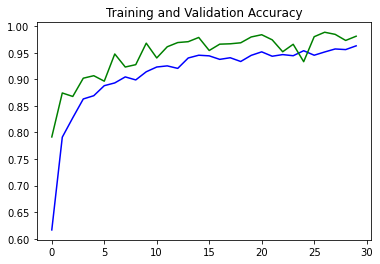%0A" class="jp-needs-light-background" />

In \[95\]:

    # plot training and validation loss
    plt.plot(history_c.history['loss'],'b') #train loss
    plt.plot(history_c.history['val_loss'],'g') #val loss
    plt.title('Training and Validation loss VGG Model') 
    plt.show()

<img src="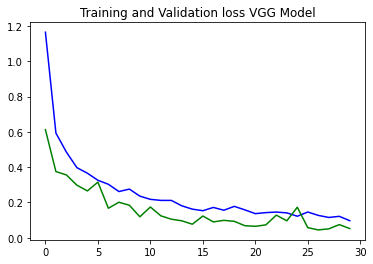%0A" class="jp-needs-light-background" />

In \[117\]:

    pd.DataFrame(
    {'Models':[
    'Base CNN Model- A',
     'Model_B',
    'CNN Model with Data Augmentation',

    'Transfer Learning Model- VGG16'],

    'Train Accuracy':['91%','86%','97%', '98%'],
    'Validation Accuracy':['89%','86%','89%', '88%']
    })

Out\[117\]:

|     | Models                           | Train Accuracy | Validation Accuracy |
|-----|----------------------------------|----------------|---------------------|
| 0   | Base CNN Model- A                | 91%            | 89%                 |
| 1   | Model\_B                         | 86%            | 86%                 |
| 2   | CNN Model with Data Augmentation | 97%            | 89%                 |
| 3   | Transfer Learning Model- VGG16   | 98%            | 88%                 |

### Conclusion<a href="#Conclusion" class="anchor-link">¶</a>

-   The model that performed the best during this project was Model\_A.
    This model has a few more convolution layers, but no batch
    normalization or dropout layers. This model may have better
    generalization on new data since there is less overfitting and a
    validation accuracy of 88%. No significant overfitting observed on
    the plots, which was surprising since it included batch
    normalization and dropout layers.
-   In this experment, the transfer models (VGG 166) doesn't show much
    improvement, infact they show overfitting as compared to other base
    models (model A and model B).
-   Data Augmentation do not help in improving the model.
-   Transfer models may not always necessarily guarantee higher model
    performance and less over-fitting.

### Recommendation<a href="#Recommendation" class="anchor-link">¶</a>

-   Using CNN’s and actually implementing it within agriculture can
    lower costs and help save plants thus produce more food